In [277]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import convolve
from scipy.ndimage import gaussian_filter, median_filter
import cv2

In [278]:
input_image_path = "report/data/ankarakalesi.jpg" 

# Load the input color image using OpenCV
input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)


## IMAGE SMOOTHING

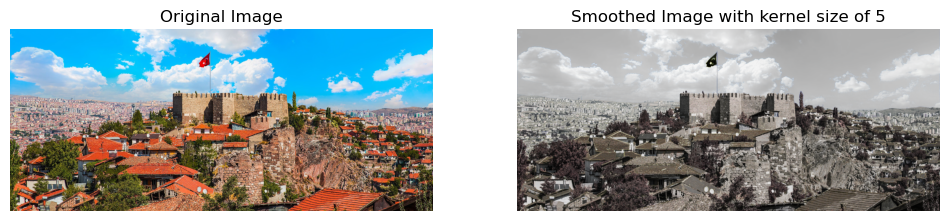

In [279]:
kernel_size = 3
smoothed_image = median_filter(input_image, size=kernel_size)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image)
plt.title("Smoothed Image with kernel size of "+ str(kernel_size))
plt.axis('off')

plt.show()

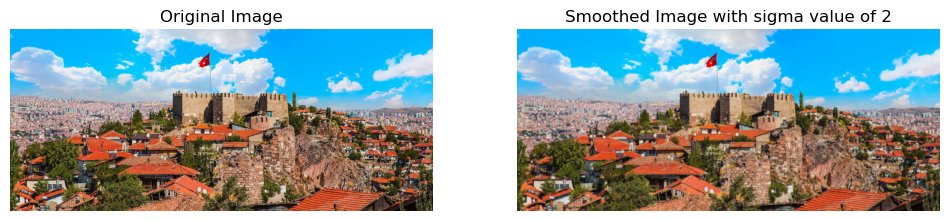

In [280]:
sigma_value = 2
smoothed_image = cv2.GaussianBlur(input_image, (0, 0), sigmaX=sigma_value)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image)
plt.title("Smoothed Image with sigma value of "+ str(sigma_value))
plt.axis('off')

plt.show()

In [281]:
def edgeDedection(input_image, sigma, k, threshold):
    input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

    
    # equation 1 and 2
    gaussian1 = cv2.GaussianBlur(input_image_gray, (0, 0), sigmaX=sigma)
    gaussian2 = cv2.GaussianBlur(input_image_gray, (0, 0), sigmaX=sigma * k)
    dog_filter = gaussian1 - gaussian2
    print(dog_filter)
    # equation 3
    edges = cv2.threshold(dog_filter, threshold, 1, cv2.THRESH_BINARY)[1]

    return edges.astype(np.uint8)

[[  0   0   0 ...   0   1   1]
 [  0   0   0 ...   0   1   1]
 [  0   0   0 ...   0   1   1]
 ...
 [255 253 252 ...   7 254 250]
 [  1 255 251 ...   5 254 250]
 [  2   0 252 ...   5 253 250]]


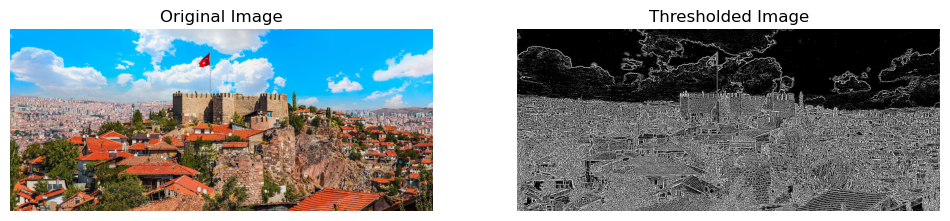

In [282]:
sigma = 1.3
k = 1.2
threshold = 15
edges = edgeDedection(input_image, sigma, k, threshold)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

plt.show()

## QUANTIZATION

In [283]:
def quantizeImage(smoothed_image, quantization_levels):

    lab_image = cv2.cvtColor(smoothed_image, cv2.COLOR_RGB2LAB)
    L_channel = lab_image[:, :, 0]

    quantized_L_channel = np.floor_divide(L_channel, 256 // quantization_levels) * (256 // quantization_levels)


    lab_image[:, :, 0] = quantized_L_channel

    quantized_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

    return quantized_image

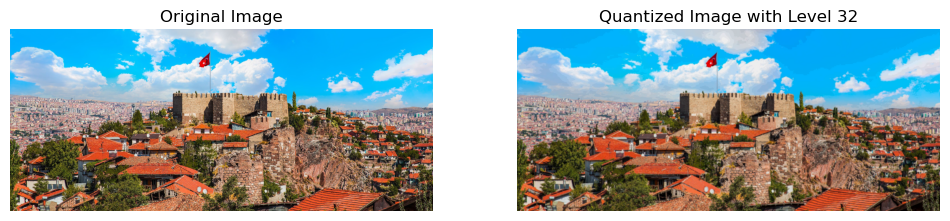

In [284]:
quantization_levels=32
quantized_image = quantizeImage(smoothed_image, quantization_levels)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title("Quantized Image with Level "+str(quantization_levels) )
plt.axis('off')

plt.show()

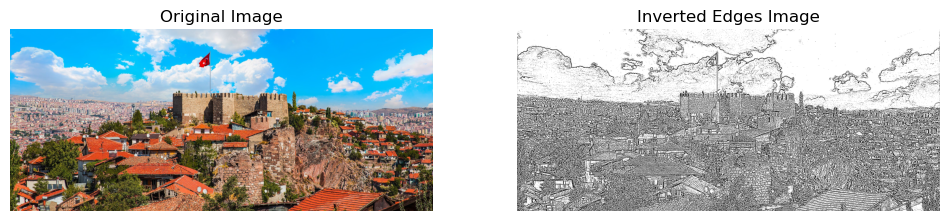

In [285]:
# Take the inverse of the estimated edges values.
inverted_edges_image = edges ^ 1

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_edges_image, cmap='gray')
plt.title("Inverted Edges Image")
plt.axis('off')

plt.show()

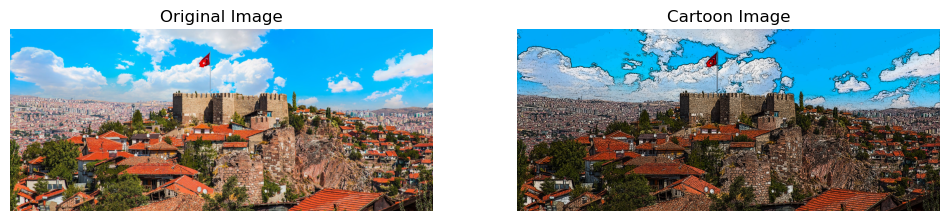

In [286]:
# Multiply the inverted edges image with the quantized image for each channel.
combined_image = quantized_image * inverted_edges_image[:, :, np.newaxis]


# Display the cartoon image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(combined_image, cmap = 'gray')
plt.title("Cartoon Image")
plt.axis('off')
plt.show()